# NumPy

In [1]:
import numpy as np

What's most important for us to know about NumPy?
NumPy is a library that makes scientific math and linear algebra easy.
Native Python lists act as arrays, but they are slow. Arrays, also called matrices or tensors, in NumPy have a type of `ndarray` on which you can use a whole host of NumPy functions. It's also great for many linear algebra operations you should become comfortable with over time. They are a lot faster due to some cool computer sciency stuff related to memory. Pandas is also built on top of NumPy.

We can make an array of data in a few ways. Let's take a look at one of them using two functions: `np.arange` and `np.reshape`

In [2]:
x = np.arange(12, dtype=np.int64).reshape(3, 4)
print(x)
print(x.shape)
print(type(x))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(3, 4)
<class 'numpy.ndarray'>


We create a matrix called x of type `ndarray` using `np.arange` and `np.reshape`.

`np.arange(12, dtype=np.int64)` creates a 1-dimensional array of numbers from 0 to 12, with a data type of int64. If you don't include it, the datatype is inferred through context, but essentially int64 allows for larger integers; if you'd like to learn more you can here https://numpy.org/doc/stable/user/basics.types.html#


`np.reshape(3, 4)` reshapes our original 1 x 12 matrix into a 3 x 4 matrix

Matrices are essential to machine learning so it is important to learn to understand and interpret their information. For example, `x[1]` accesses the 2nd row of data (index starts at 0)

In [3]:
print(x[1])
print(x[1].shape)

[4 5 6 7]
(4,)


We can access columns by first specifying the desired row (':' indicates all rows) and specifying the desired column, returning a list of the returned values

In [4]:
print(x[:, 0])
print(x[:, 0].shape)


[0 4 8]
(3,)


We can edit the values of specific entries. In this case we change all values from the second row to 0

In [5]:
x[1] = 0
x

array([[ 0,  1,  2,  3],
       [ 0,  0,  0,  0],
       [ 8,  9, 10, 11]], dtype=int64)

We can make arrays in many ways. A very common way to initialize a matrix if you know its intended size is to use `np.zeros(rows, columns)`

In [6]:
np.zeros(12).reshape(3,4)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
np.ones(12).reshape(3, 4)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

We can also make an array with anything we want, simply through `np.array([list])`

In [8]:
a = np.array([1, 2, 3])
b = np.array(([1, 2, 3], [4, 5, 6])) # we need to encapsulate additional dimensions in a new set of brackets here
print(a)
print(b)

[1 2 3]
[[1 2 3]
 [4 5 6]]


There are a ton of linear algebra operations we can also use with NumPy such as `np.transpose()` and `np.sum`. We can also easily transpose with `matrix.T`

In [72]:
a = np.array(([1, 2, 3], [4, 5, 6]))
print(a)

aT = np.transpose(a)
print(aT)

aT = a.T
print(aT)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]
[[1 4]
 [2 5]
 [3 6]]


In [10]:
print(np.sum(a))
print(np.sum(a, axis=0))

21
[5 7 9]


We use Pandas and NumPy arrays in a similar way. NumPy is better for purely numerical data, while Pandas handles panel data.

# PIL and matplotlib

We can also read and load images easily with the Python Imaging Library and NumPy

We read in the image using `Image.open('path')` and then we turn it into an `ndarray` object with `np.asarray`

In [110]:
from PIL import Image

img = Image.open('images\download (1).jpg')
img_np = np.array(img)
img_np

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
print(type(img)) # It's very important to have an understanding of the different object types to avoid frustration down the line
print(type(img_np))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


os.listdir() is used to get the list of all files and directories in the specified directory. Using this method we can import all of the files in a folder with a for loop

In [13]:
import os, time
img_list = [] #create an empty list that we can store our files in

t = time.time()

for filename in os.listdir('images'):
    if filename.endswith("jpg"):
      img_list.append(np.asarray(Image.open('images/'+ filename)))

t = time.time() - t
print("%.4fs" % t)

0.3414s


 Let's look at the shape of our images

In [14]:
img_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [15]:
print(len(img_list))
print(type(img_list))

62
<class 'list'>


The function `.shape` does not work with lists! This is why it's important to be aware of the types of the objects we are working with. What we want is an ndarray. We can achieve this with the `np.asarray(list)` function

In [ ]:
img_ndarray = np.asarray(img_list)
print(img_ndarray.shape)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (62,) + inhomogeneous part.

Now we can see the dimensions of the list of images! We have `x` images with shape `l * w`. What is this `3`?

In [ ]:
img_ndarray[0].shape # We are looking at the shape of just the first image.

In [ ]:
#this allows the image to be loaded in a model that takes in multiple images in its input shape
model_readyImg = img_ndarray[0].reshape(1, 640, 640, 3)

Matplotlib has a looottt of functions. It's quicker to import just pyplot for now, as it covers most of the functionality we need from matplotlib

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img_ndarray[0])

NameError: name 'img_ndarray' is not defined

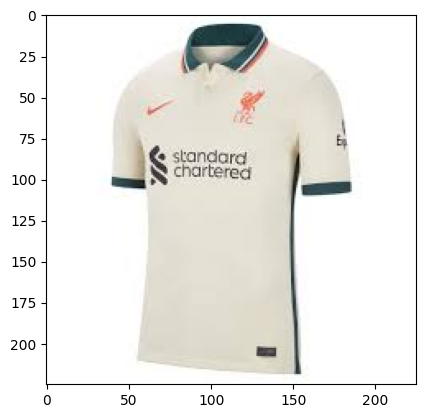

In [17]:
plt.imshow(img) # this is the first image we loaded with PIL

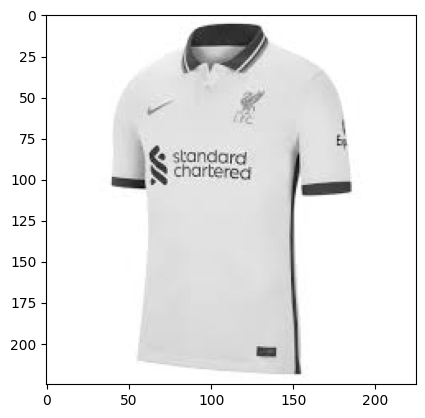

In [111]:
image = np.array(img.convert('L')) # we convert the image to grey-scale
plt.imshow(image, cmap="gray")

We can create a threshold - any pixel above will be white, and any pixel above will be black

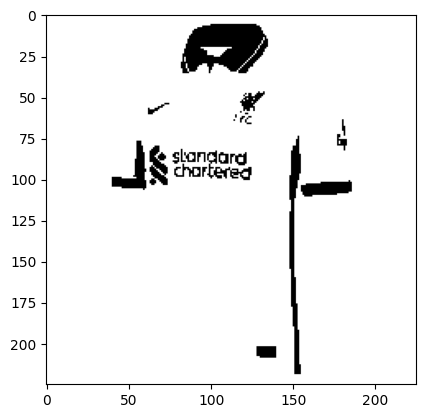

In [112]:
threshold = 190
image[image < threshold] = 0
image[image >= threshold] = 255

plt.imshow(image, cmap="gray")

In [113]:
nums = np.random.randint(0, 11, size=(6,10)) # create a 6x10 matrix of random integers from 0 to 10

We've generated a dataset: 6 rows and 10 columns of random numbers between 0 and 10. We can plot this data in a few ways. The first is by simply passing the array of numbers into the function `plt.plot()`, specifying the x-axis and our data in the function parameters.

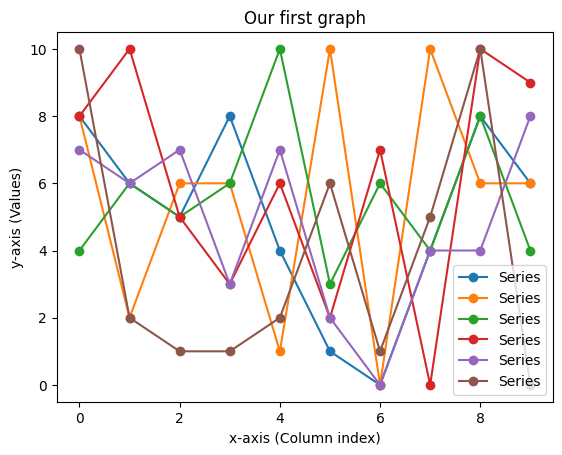

In [114]:
x_values = np.arange(nums.shape[1]) # create an index variable

plt.plot(x_values, nums.T, '-o', label='Series') # transpose because it plots each series' value simultaneously according to the x-axis, instead of plotting each series seperately
plt.xlabel("x-axis (Column index)")
plt.ylabel("y-axis (Values)")
plt.title("Our first graph")
plt.legend()
plt.show()

This plot is messy and hard to read, so let's plot them individually.

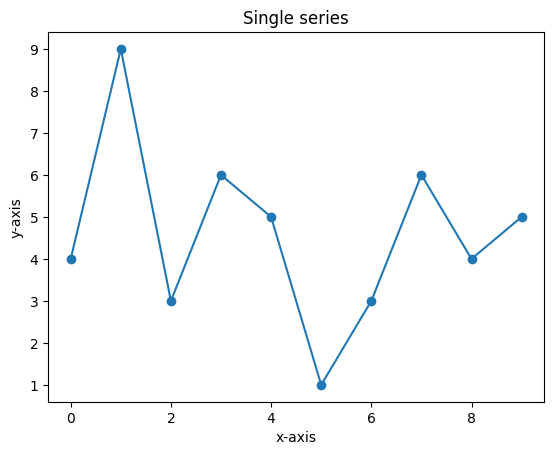

In [81]:
plt.plot(nums[0], '-o') #pass in the first series
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Single series")
plt.show()

`plt.plot()` creates a single plot. We can create a figure with multiple plots using `plt.subplots()`

In [140]:
def plotValues(data, w, h): #create a function so that we don't have to replicate this code every time we want to make plots

    x_values = np.arange(data.shape[1])
    figure, axis = plt.subplots(h, w, figsize=(16,10))
    
    for i in range(h):
        for j in range(w):

            index = i * w + j
            axis[i,j].plot(x_values, data[index], '-o', label=f'Series {i+1}')
            axis[i,j].set_title(f'Subplot {index+1}')
            axis[i,j].set_xlabel('x-axis')
            axis[i,j].set_ylabel('y-axis')

    plt.show()

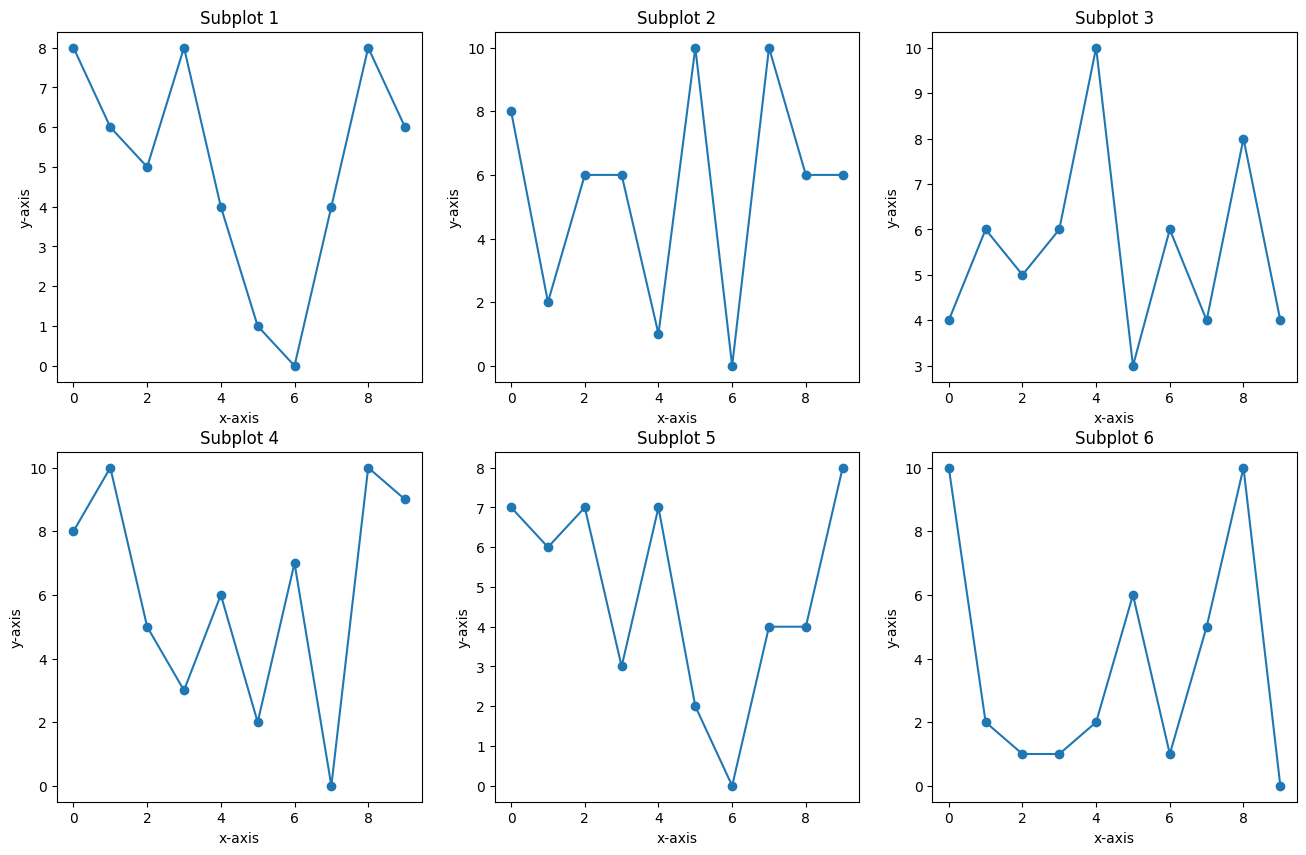

In [141]:
plotValues(nums, 3, 2)